In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

## Igor's speedy method...

In [2]:
from __future__ import print_function, absolute_import
from IPython import display
import math
import matplotlib.pyplot as plt
import numpy as np

from multiple_traj_opt import (
    make_mto,
    MultipleTrajOpt,
    initial_conditions_Russ,
    initial_conditions_grid,
    initial_conditions_random,
    initial_conditions_random_all_dims,
)
from nn_system.networks import *

from igor import (
    do_igor_optimization,
    igor_traj_opt_serial,
    igor_traj_opt_parallel,
    igor_supervised_learning,
    igor_supervised_learning_cuda,
    visualize_intermediate_results,
)

## Applying to Pendulum

doing warm start
completed 10 trajectories
completed 20 trajectories
completed 30 trajectories
completed 40 trajectories
completed 50 trajectories
completed 60 trajectories
completed 70 trajectories
completed 80 trajectories
completed 90 trajectories
completed 100 trajectories
finished warm start
completed 10 trajectories
completed 20 trajectories
completed 30 trajectories
completed 40 trajectories
completed 50 trajectories
completed 60 trajectories
completed 70 trajectories
completed 80 trajectories
completed 90 trajectories
completed 100 trajectories
(3100, 2)
(3100, 1)
[1,  1000] loss: 0.001
[2,  1000] loss: 0.001
[3,  1000] loss: 0.001
[4,  1000] loss: 0.001
[5,  1000] loss: 0.001
[6,  1000] loss: 0.001
[7,  1000] loss: 0.001
[8,  1000] loss: 0.001
[9,  1000] loss: 0.001
[10,  1000] loss: 0.001
[11,  1000] loss: 0.001
[12,  1000] loss: 0.001
[13,  1000] loss: 0.001
[14,  1000] loss: 0.001
[15,  1000] loss: 0.001
[16,  1000] loss: 0.001
[17,  1000] loss: 0.001
[18,  1000] loss: 0.00

<IPython.core.display.Javascript object>


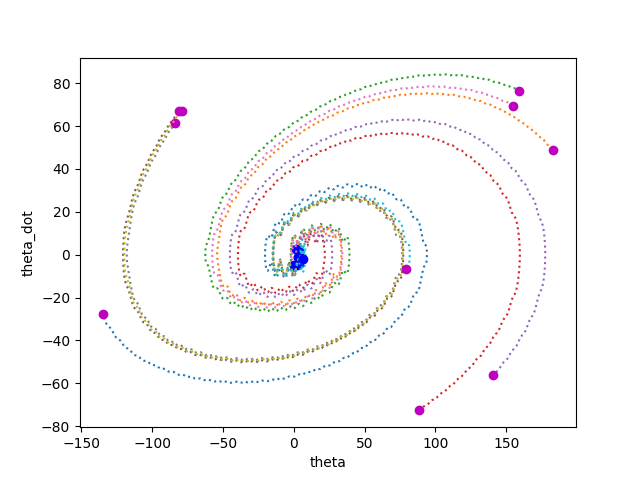

2
quit simulation early at 15.2/16.0 due to exceeding time limit
last x_knot:  [-135.10745688  -27.47329084]
2
quit simulation early at 15.796/16.0 due to exceeding time limit
last x_knot:  [183.40980321  48.73287168]
2
last x_knot:  [159.25301294  76.43270563]
2
quit simulation early at 15.804/16.0 due to exceeding time limit
last x_knot:  [ 88.39635739 -72.61391212]
2
quit simulation early at 15.724/16.0 due to exceeding time limit
last x_knot:  [140.94726624 -55.87072121]
2
quit simulation early at 15.055/16.0 due to exceeding time limit
last x_knot:  [-81.35938223  67.08615166]
2
last x_knot:  [154.79774246  69.49940973]
2
last x_knot:  [-83.84550412  61.25416906]
2
quit simulation early at 15.647/16.0 due to exceeding time limit
last x_knot:  [-79.21757753  67.20907029]
2
last x_knot:  [79.02473201 -6.45323758]


In [10]:
# First let's just see what Igor Optimization does on pendulum
def kNetConstructor():
#     return MLP(2, 32, layer_norm=False)
#     return MLP(2, 2, layer_norm=False)
    return FCBIG(2, 2)
net = kNetConstructor()
expmt = "pendulum"
ic_list=None

do_igor_optimization(net, kNetConstructor, expmt, ic_list, naive=False, warm_start=None)

## Applying to Cartpole

result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
completed 10 trajectories
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
completed 20 trajectories
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kInfeasibleConstraints
completed 30 trajectories
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kInfeasibleConstraints
completed 40 trajectories
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kInfeasibleConstraints
resul

<IPython.core.display.Javascript object>


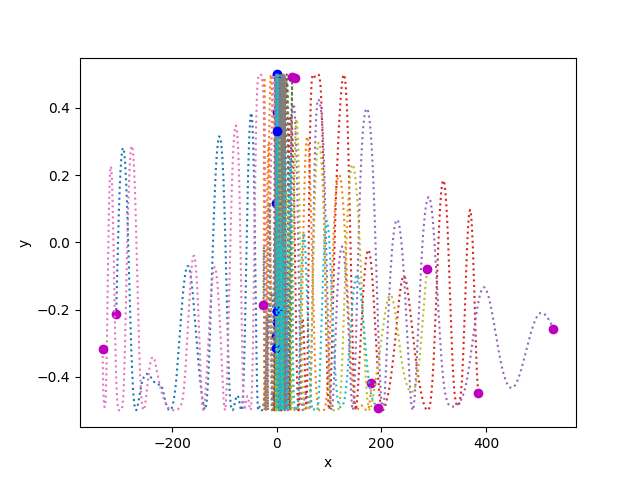

4
last x_knot:  [-306.87170278    1.13322585  -48.20215424   -6.41831051]
4
last x_knot:  [181.21049523   6.86417736  78.18551839   6.71837405]
4
last x_knot:  [29.26026959 28.44772404  8.81029094 -5.30287132]
4
last x_knot:  [385.09911902   5.82181617  33.59697342   1.92074783]
4
last x_knot:  [529.41171573  13.5984479  104.86887001  -0.82142311]
4
last x_knot:  [34.33089092 47.31771432 17.77823471  0.18776662]
4
last x_knot:  [-333.03957563    0.88069732  -15.24849569    5.16628027]
4
last x_knot:  [-25.21051503 -67.92658853  -4.7955144   -3.55282709]
4
last x_knot:  [287.57683095   4.87075352  52.43398668  -0.86039048]
4
last x_knot:  [193.52753148  12.74531677  62.72417989  -0.90154234]


In [26]:
# First let's just see what Igor Optimization does on pendulum
kNetConstructor = lambda: MLP(4, 128, layer_norm=False)
net = kNetConstructor()
expmt = "cartpole"
ic_list=None

do_igor_optimization(net, kNetConstructor, expmt, ic_list, warm_start=None)

## Applying to to Pendulum

In [ ]:
# First let's just see what Igor Optimization does on pendulum
net = FCBIG(2, 128)
expmt = "pendulum"
num_trajectories = # TODO: have some default for pendulum and cartpole
ic_list = initial_conditions_grid(num_trajectories, ) # TODO: have some default for pendulum and cartpole
do_igor_optimization(net, expmt, ic_list, warm_start=None, num_trajectories=num_trajectories)

In [ ]:
# Then let's experiment with the different minibatch schemes.
# First let's find a good batch size
ic_gen    = # Expmt default
n_iters   = 
inner_fn  = 
network   = 
traj_bank = []
mini_batch_and_warm_start(ic_gen, n_iters, inner_fn, network, warm_start_method, traj_bank)

In [ ]:
# Method1
warm_start_method = 
mini_batch_and_warm_start(ic_gen, n_iters, inner_fn, network, warm_start_method, traj_bank)

In [ ]:
# Method2
warm_start_method = 
mini_batch_and_warm_start(ic_gen, n_iters, inner_fn, network, warm_start_method, traj_bank)

In [ ]:
# Method3
warm_start_method = 
mini_batch_and_warm_start(ic_gen, n_iters, inner_fn, network, warm_start_method, traj_bank)

In [ ]:
# Method4
warm_start_method = 
mini_batch_and_warm_start(ic_gen, n_iters, inner_fn, network, warm_start_method, traj_bank)

In [ ]:
# Method5
warm_start_method = 
mini_batch_and_warm_start(ic_gen, n_iters, inner_fn, network, warm_start_method, traj_bank)

In [ ]:
# Method6
warm_start_method = 
mini_batch_and_warm_start(ic_gen, n_iters, inner_fn, network, warm_start_method, traj_bank)

In [ ]:
# Now with adding dropout to favorite warm-starting scheme above


## Applying to to Cartpole

## Compare best method to VI solutions?

<IPython.core.display.Javascript object>


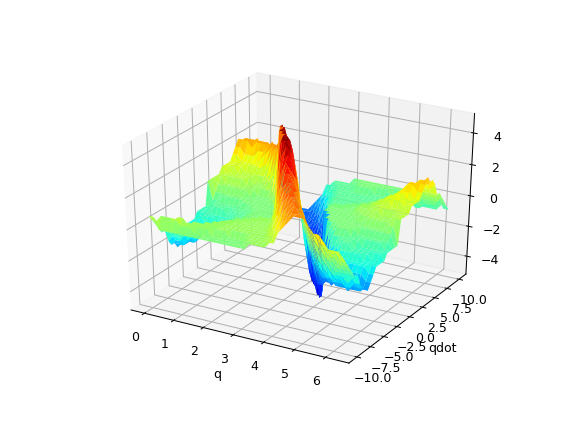

<IPython.core.display.Javascript object>


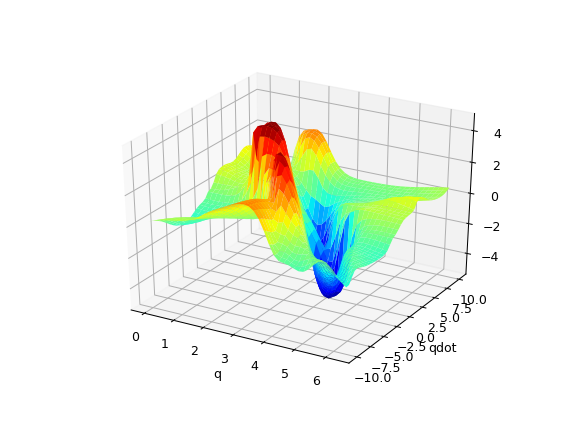

In [211]:
from traj.vi_utils import (
    load_vi_policy,
    vis_vi_policy,
    vis_nn_policy_like_vi_policy
)
vi_policy = load_vi_policy('good', "pendulum")
vis_vi_policy(vi_policy)
vis_nn_policy_like_vi_policy(net, vi_policy)

using_ics=  False
knot_MSE: [13.43466199], traj_MSE: [50.41605436]
[(80000, 2), (80000, 1), (80000, 1)]


<IPython.core.display.Javascript object>


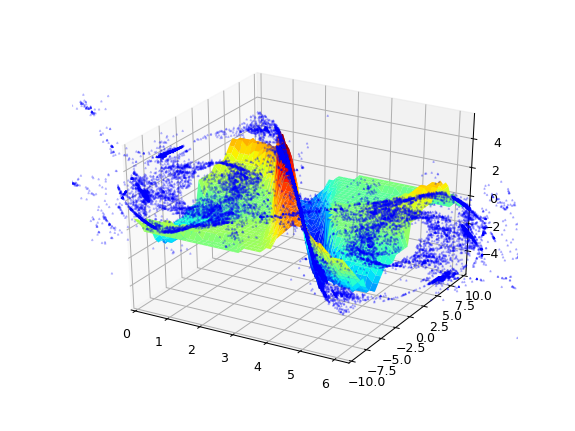

In [201]:
from traj.vi_utils import (graph_vi_policy_vs_traj_knot_scatter)

# ics_or_dircols = ics
ics_or_dircols = dircols
graph_vi_policy_vs_traj_knot_scatter(vi_policy, ics_or_dircols, 
                                     combine_vi_policy_and_scatter=True,
                                     plot_residual=False)